In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-01-13 10:39:36.393883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 10:39:36.414109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 10:39:36.420292: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 10:39:36.435130: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 10:39:38.299456: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
54,RF-SPUD,ComputerHardware,even,0.3,"{'knn': 12, 'OD_method': 'default', 'agg_metho...",{'42': 0.10489237029921472},{'42': 0.0},{'42': -0.046070312096956556},{'42': 0.1066053135562639},{'42': 0.11024929927076044},{'42': 1.3232845859728946},{'42': 1.3259915818965262},"{'42': {'RF-OOB': 0.16979378326527683, 'KNN': ...",{}
1250,RF-MASH,AirfoilSelfNoise,even,0.3,"{'knn': 2, 'page_rank': 'off-diagonal', 'DTM':...",{'42': -0.05329909115034659},{'42': 0.03304856244485967},{'42': 0.19494628312436135},{'42': 0.2086079854836681},{'42': 0.11552076901245145},{'42': 0.9649215160353063},{'42': 0.9127335251263025},"{'42': {'RF-OOB': 0.2071423307292869, 'KNN': 0...","{'connection_limit': 0.019814737291489783, 'th..."
1796,SPUD,segmentation,turn,0.3,"{'knn': 7, 'OD_method': 'default', 'agg_method...","{'42': 0.36492890995260663, '1738': 0.36492890...","{'42': 0.0003369196558927248, '1738': 0.000336...","{'42': 0.6994047619047619, '1738': 0.705357142...","{'42': 0.686046511627907, '1738': 0.6860465116...","{'42': 0.6395348837209303, '1738': 0.581395348...","{'42': 0.6394917235802458, '1738': 0.568190323...","{'42': 0.6874772514307397, '1738': 0.673794521...","{'42': {'RF-OOB': 0.7172619047619048, 'KNN': 0...","{'knn': 0.03519220085053695, 'OD_method': 0.02..."
2710,SPUD,Medicaldataset,skewed,0.3,"{'knn': 137, 'OD_method': 'mean', 'agg_method'...",{'42': 0.5693707354056103},{'42': 1.7243747848123967e-06},{'42': 0.5834123222748815},{'42': 0.615530303030303},{'42': 0.6174242424242424},{'42': 0.5632776587673495},{'42': 0.6024337222052758},"{'42': {'RF-OOB': 0.5786729857819906, 'KNN': 0...","{'knn': 0.029456682344063866, 'OD_method': 0.0..."
2203,RF-SPUD,winequality-red,random,0.3,"{'knn': 130, 'OD_method': 'default', 'agg_meth...","{'42': 0.05190744215134459, '1738': 0.05065666...","{'42': 0.0005905817464871142, '1738': 1.955568...","{'42': 0.04300234558248632, '1738': 0.05551211...","{'42': 0.0203125, '1738': 0.0328125, '5271': 0...","{'42': 0.0390625, '1738': 0.046875, '5271': 0....","{'42': 0.021567824915740424, '1738': 0.0308783...","{'42': 0.020540729933086904, '1738': 0.0300612...","{'42': {'RF-OOB': 0.05746677091477717, 'KNN': ...",{}


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('SPUD', 'iris', 'turn', {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...


240 300 300


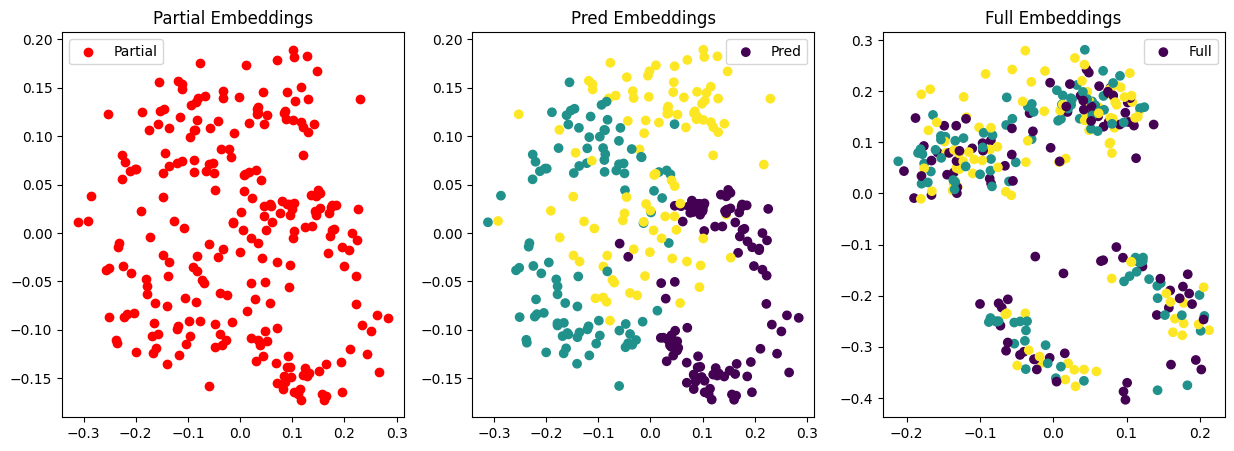

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

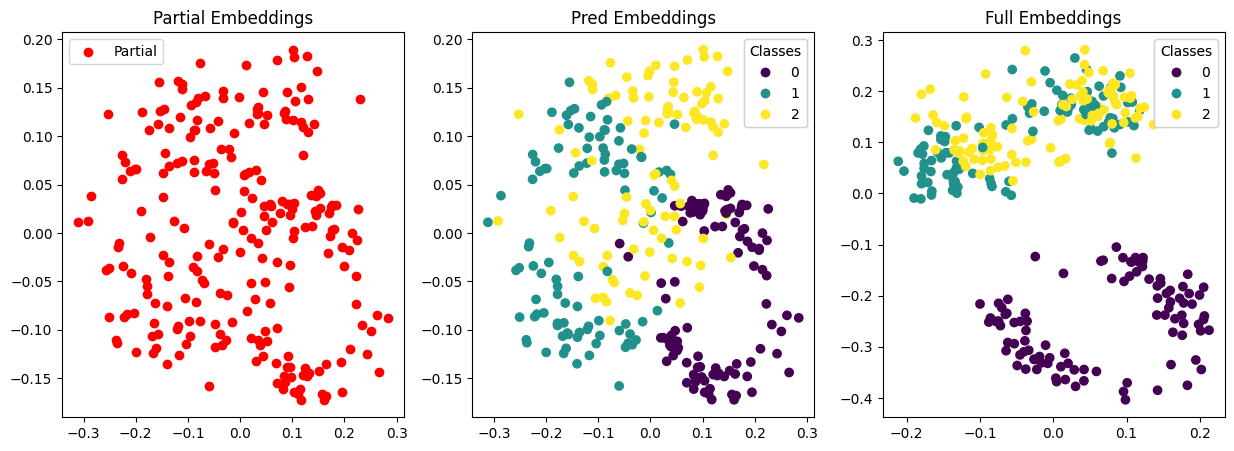

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


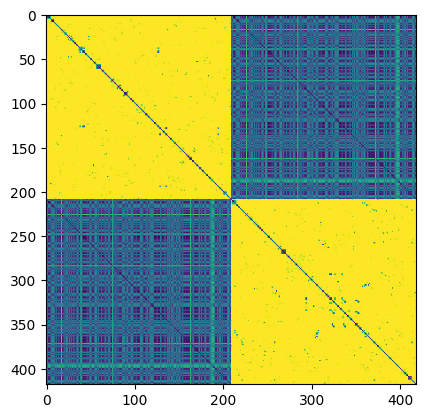

In [8]:
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
print(tasks[0])
plt.imshow(block_full)

# Marshall's Tests here?

In [9]:
#Unpack all the code and run the mantel test
r_obs, p_value = mantel_test(*iris_task)

Results already exist for SPUD, iris, turn.


In [ ]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=len(tasks))): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task, return_labels=False)
            for task in tasks[:5]
        )


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
  0%|          | 0/2221 [00:00<?, ?it/s]

2025-01-13 10:40:12.979048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 10:40:12.997232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 10:40:13.002719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 10:40:13.016427: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 10:40:14.605084: W tensorflow/compiler/tf2

       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting enco

       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...


  0%|          | 5/2221 [00:28<3:28:05,  5.63s/it] 


ValueError: too many values to unpack (expected 3)

# Marshall's Vizualizations Here?